# **Computational and Numerical Methods Lab - 6**

```
Abhimanyu Karia: 202201435
Devarshi Patel : 202201447
```

# Lagrange Interpolation:

- Lagrange Interpolation is a way of finding the value of any function at any given point when the function is not given. We use other points on the function to get the value of the function at any required point.
- Formula for lagrange interpolation:
    - Given a set of n+1 points $(x_0,y_0),(x_1,y_1)......(x_n,y_n)$, lagrange polynomial is defined as:
    - 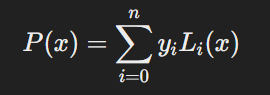
    - where $L_i(x)$ is the basis polynomial given by:
    - 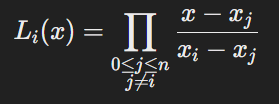

# Newtons Interpolation polynomial:

- Newton's interpolation is a method of polynomial interpolation that uses divided differences to construct the interpolating polynomial. It is particularly useful when data points are added incrementally, as it allows for easy updating of the polynomial without recomputing everything.
- Formula for newtons interpolating polynomial:
    - Let $P_n(x)$ denote the polynomial interpolating $f(x_i)$ at $x_i$ for i=0,1.....n . 
    - Thus $P_n(x_i) = f(x_i)$
    - General formula given below:
    - 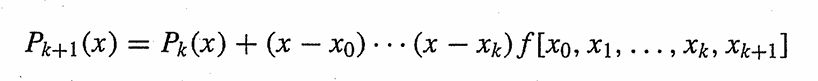
    - Here $f[x_0,x_1,...,x_k,x_{k+1}]$ is the divided difference
    - Divided difference of order n has a general formula:
    - 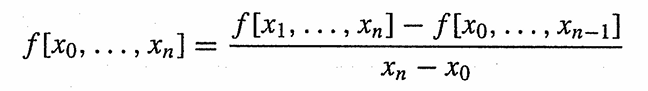

# Why is newtons interpolation polynomial better then Lagrange interpolation polynomial ?

- You can easily add new points to the interpolation without recalculating the entire polynomial again from scratch. This is because Newton’s interpolation builds the polynomial incrementally by adding terms for each new point.
- In Lagrange polynomial, when a new data point is added, the entire Lagrange polynomial needs to be recalculated. This makes it computationally inefficient for dynamic datasets where new points might be added.


# Coding exercise

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import mp

In [2]:
class Interpolation:
    def __init__(self,matrix,function = None) -> None:
        self.function = function
        self.matrix = matrix
        self.err = 1e-2
    def mypolyint(self,matrix,plot_poly = False):
        x = []
        y = []
        n = len(matrix)
        for i in range(n):
            x.append(matrix[i][0])
            y.append(matrix[i][1])
        poly_coef = np.zeros(n)
        for i in range(n):
            lan = np.poly1d([1])
            for j in range(n):
                if i != j:
                    lan *= (np.poly1d([1,-x[j]])/(x[i] - x[j]))
            poly_coef += y[i] * lan.coefficients
        polynomial = np.poly1d(poly_coef)
        if plot_poly:
            self.plot_fun(x,y,polynomial)
        return poly_coef,polynomial
    
    def divided_diff(self,x,y,dp,low,high):
        if low == high:
            return y[low]
        if dp[low][high] is not None:
            return dp[low][high]
        if high == low + 1:
            dp[low][high] = (y[high] - y[low])/(x[high] - x[low])
            return dp[low][high]
        dp[low][high] = (self.divided_diff(x,y,dp,low + 1,high) - self.divided_diff(x,y,dp,low,high - 1))/(x[high] - x[low])
        return dp[low][high]
    
    def mynewtonint(self,matrix,plot_poly = False):
        x = []
        y = []
        n = len(matrix)
        for i in range(n):
            x.append(matrix[i][0])
            y.append(matrix[i][1])
        poly_coef = np.zeros(n)
        polynomial = np.poly1d([y[0]])
        x_poly = np.poly1d([1])
        dp = [[None for _ in range(n)] for _ in range(n)]
        for i in range(1,n):
            x_poly *= np.poly1d([1,-x[i-1]])
            temp = polynomial + x_poly*self.divided_diff(x,y,dp,0,i)
            polynomial = temp
        poly_coef = polynomial.coefficients
        if plot_poly:
            self.plot_fun(x,y,polynomial)
        return poly_coef,polynomial
    
    def plot_fun(self,x,y,polynom):
        plt.scatter(x,y,label = 'Points')
        n = len(x)
        x_range = np.arange(min(x)-0.1,max(x)+0.1,self.err)
        y_pred = polynom(x_range)
        plt.plot(x_range,y_pred,label = 'Interpolated Polynomial')
        if self.function is not None:
            plt.plot(x_range,self.function(x_range),label = 'Original Function')
        plt.legend()
        plt.grid(True)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.plot()        

# Q - 1

[0.36400986 0.29566378 1.05860819 1.        ]


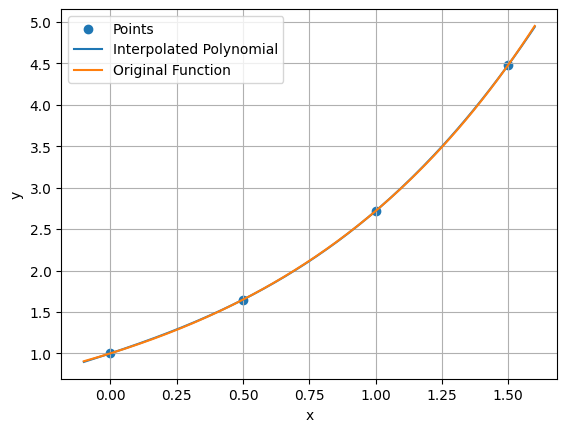

In [3]:
matrix = [(0,1),(0.5,np.exp(0.5)),(1,np.exp(1)),(1.5,np.exp(1.5))]
ip = Interpolation(matrix,function= lambda x : np.exp(x))
coef,poly_i = ip.mypolyint(matrix,plot_poly=True)
print(coef)

[ 4.86562014e-05 -1.89424021e-03  2.51645458e-02 -1.17183053e-01
 -7.49093062e-02  1.74637586e+00 -3.23294816e+00  4.65534570e+00]


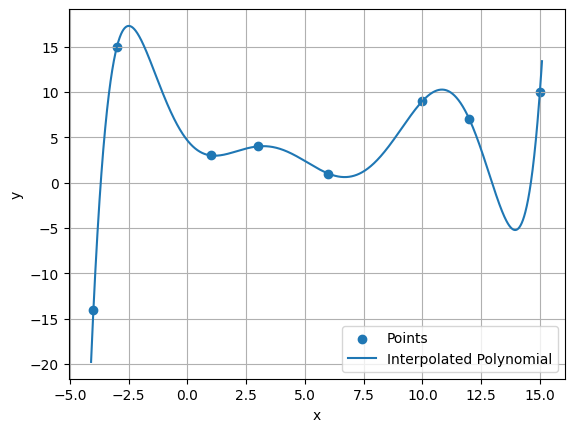

In [4]:
matrix = [[1,3], [3,4], [6,1], [-3, 15], [-4, -14], [15, 10], [10, 9], [12, 7]]
ip = Interpolation(matrix)
coef,poly_i = ip.mypolyint(matrix,plot_poly=True)
print(coef)

Result:
- From the graph it is clearly visible tha the polynomial interpolates the given points.

# Q - 2

[0.36400986 0.29566378 1.05860819 1.        ]
       3          2
0.364 x + 0.2957 x + 1.059 x + 1


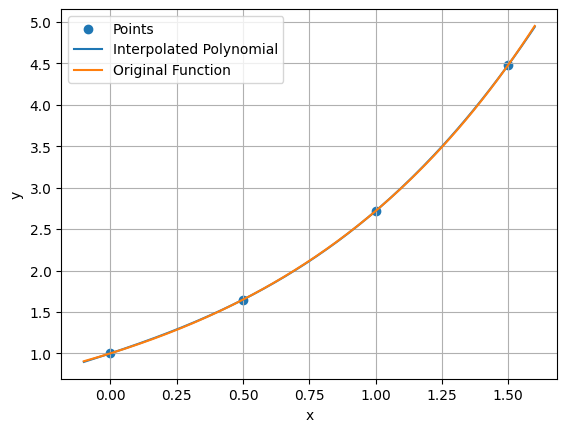

In [5]:
matrix = [(0,1),(0.5,np.exp(0.5)),(1,np.exp(1)),(1.5,np.exp(1.5))]
ip = Interpolation(matrix,function= lambda x : np.exp(x))
coef,poly_i = ip.mynewtonint(matrix,plot_poly=True)
print(coef)
print(poly_i)

[ 4.86562014e-05 -1.89424021e-03  2.51645458e-02 -1.17183053e-01
 -7.49093062e-02  1.74637586e+00 -3.23294816e+00  4.65534570e+00]


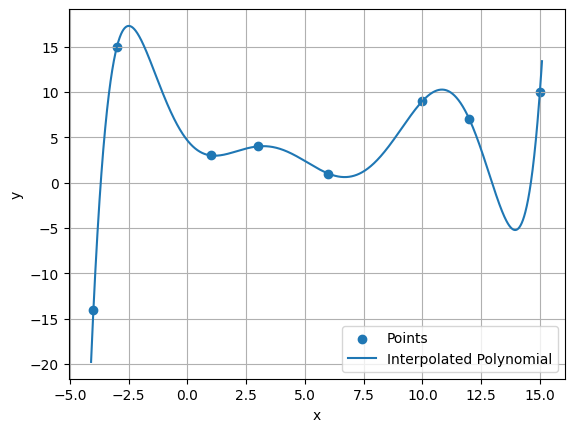

In [6]:
matrix = [[1,3], [3,4], [6,1], [-3, 15], [-4, -14], [15, 10], [10, 9], [12, 7]]
ip = Interpolation(matrix)
coef,poly_i = ip.mynewtonint(matrix,plot_poly=True)
print(coef)

Result:
- From the graph it is clearly visible tha the polynomial interpolates the given points.

# Q - 3

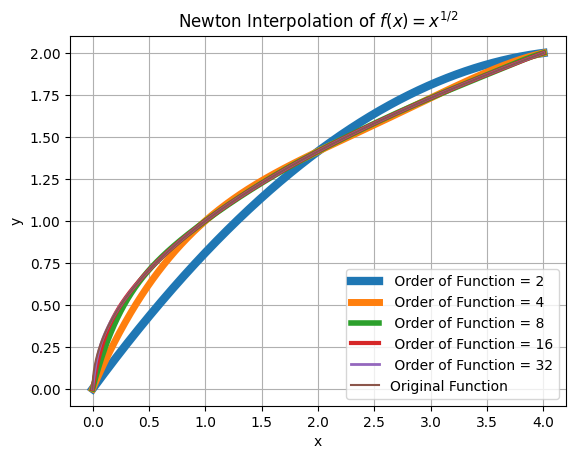

In [7]:
# Set precision
mp.dps = 24
x = [mp.mpf(z) for z in np.arange(0,4+1e-3,1e-3,dtype=np.float64)]
n = len(x)
samples = [2,4,8,16,32]
x_sample = []
y_sample = []
func = lambda z: np.sqrt(z)
for i in range(0,len(samples)):
    idx = np.linspace(0,n-1,samples[i]+1,dtype = int)
    x_val = [mp.mpf(z) for z in np.linspace(0,4,samples[i]+1,dtype=np.float64)]
    x_sample.append(x_val)
    y_sample.append(func(x_val))
y_sample
poly_list = []
for i in range(len(x_sample)):
    matrix = []
    for j in range(len(x_sample[i])):
        matrix.append([x_sample[i][j],y_sample[i][j]])
    ip = Interpolation(matrix,function = func)
    coef,poly_i = ip.mynewtonint(matrix)
    poly_list.append(poly_i)
    plt.plot(x,poly_i(x),label = ' Order of Function = ' + str(samples[i]),linewidth = len(x_sample) - i + 1)
# plt.scatter(x_sample[0],poly_list[0](x_sample[0]),label = 'f2')
# plt.scatter(x_sample[1],poly_list[1](x_sample[1]),label = 'f4')
# plt.scatter(x_sample[2],poly_list[2](x_sample[2]),label = 'f8')
# plt.scatter(x_sample[3],poly_list[3](x_sample[3]),label = 'f16')
#plt.scatter(x_sample[4],poly_list[4](x_sample[4]),label = 'f32')
# plt.plot(x,poly_list[0](x),label = ' Order of Function = ' + str(samples[0]))
# plt.plot(x,poly_list[1](x),label = ' Order of Function = ' + str(samples[1]))
# plt.plot(x,poly_list[2](x),label = ' Order of Function = ' + str(samples[2]))
# plt.plot(x,poly_list[3](x),label = ' Order of Function = ' + str(samples[3]))
#plt.plot(x,poly_list[4](x),label = ' Order of Function = ' + str(samples[4]),linewidth = 3)
plt.plot(x,func(x),label = 'Original Function')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Newton Interpolation of $f(x) = x^{1/2}$')
plt.show()


{2: mpf('0.284323829534184781643363161'), 4: mpf('0.168972595464379960074091569'), 8: mpf('0.104044147283316770437870485'), 16: mpf('0.0657646557153785557093025559'), 32: mpf('0.0423320799915777830889416769')}


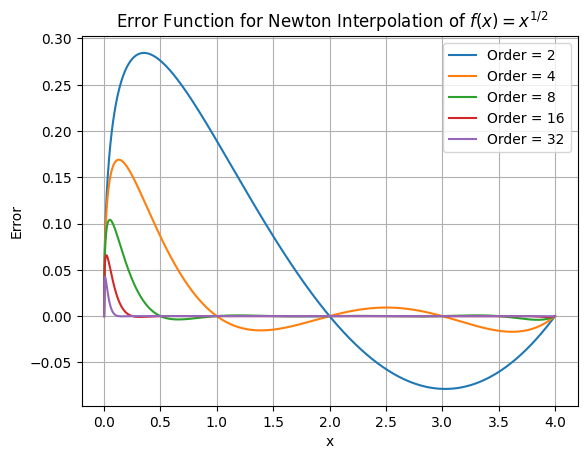

[]

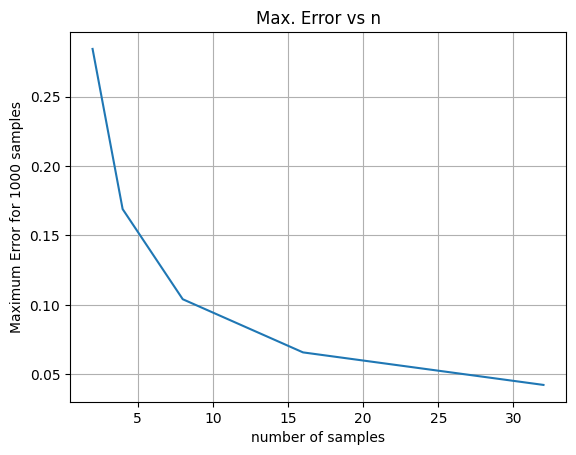

In [9]:
#Sample x
s_size = 1000
x = np.linspace(0,4,s_size)
max_err = dict()
plt.figure(1)
for i in range(len(samples)):
    err_fun = func(x) - poly_list[i](x)
    max_err[samples[i]] = max(abs(err_fun))
    plt.plot(x,err_fun,label = 'Order = ' + str(samples[i]))
print(max_err)
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('Error')
plt.title(' Error Function for Newton Interpolation of $f(x) = x^{1/2}$')
plt.show()
plt.figure(2)
err_sample = max_err.keys()
err_val = max_err.values()
plt.plot(err_sample,err_val)
plt.grid(True)
plt.xlabel('number of samples')
plt.ylabel('Maximum Error for 1000 samples')
plt.title('Max. Error vs n')
plt.plot()

Result:
- As the order of our function increases the error decreases, which means the result becomes more accurate as you keep on increasing the order.